1. 데이터 탐색 
- 1. 시각화 포함 탐색적 자료분석을 시행하시오(EDA)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes_for_test.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
diabetes = data.groupby(['Outcome']).mean()
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,36.934000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [39]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

모든 변수가 수치형 변수로 이루어져 있으며, 종속변수인 Outcome변수의 데이터는 0, 1로 분류 알고리즘을 적용해아한다고 판단

c:\Users\suhye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\suhye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\suhye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\suhye\anacond

Text(0.5, 0.98, 'EDA')

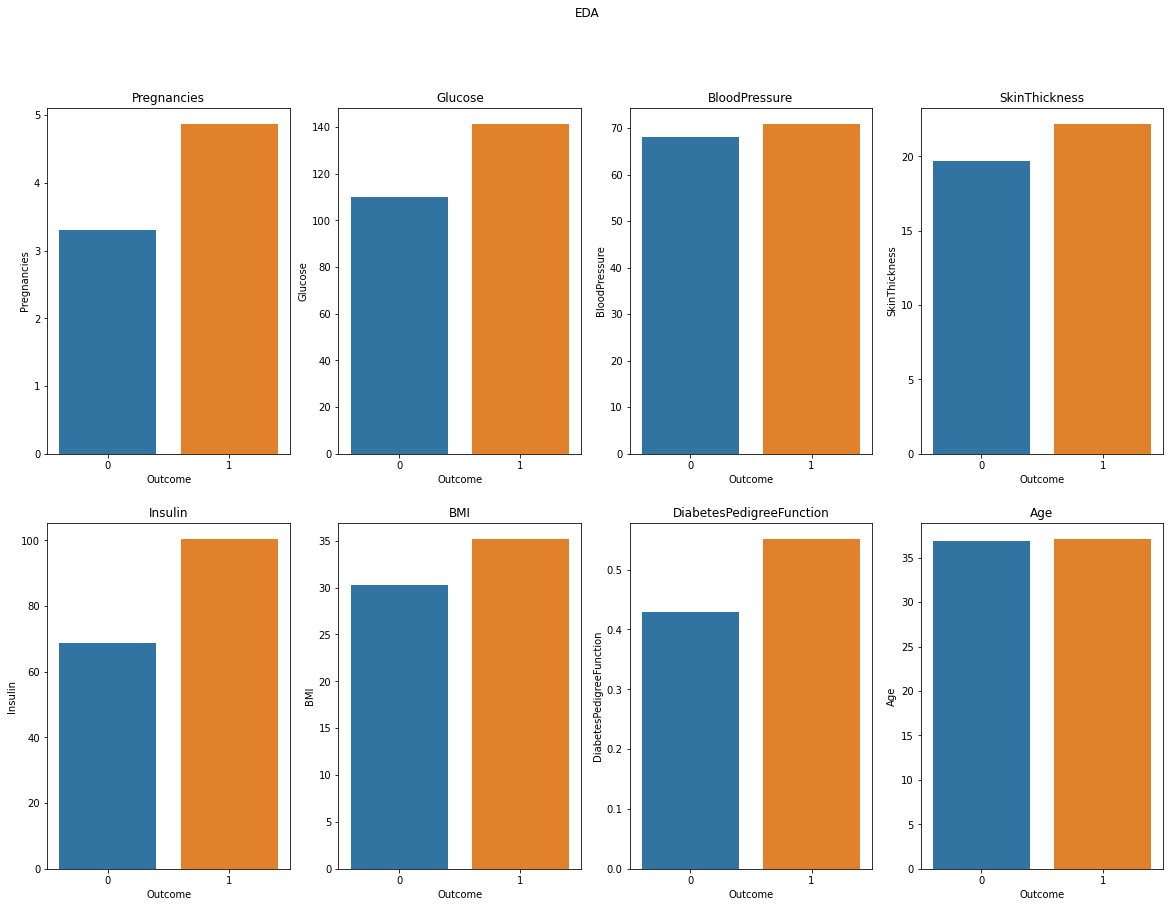

In [42]:
fig, axes = plt.subplots(2,4,figsize=(20,14))

for i in range(4):
    sns.barplot(diabetes.index, diabetes.iloc[:,i],
                ax = axes[0][i])
    axes[0][i].set_title(diabetes.columns[i])
    
    
for i in range(4):
    sns.barplot(diabetes.index, diabetes.iloc[:,i+4], ax = axes[1][i])
    axes[1][i].set_title(diabetes.columns[i+4])
    
plt.suptitle('EDA')

EDA 해석 결과
1. 당뇨병이 있는 사람은 없는 사람보다 Pregnancies의 평균 수치가 높다. 
2. 당뇨벙이 있는 사람은 없는 사람보다 Glucose의 평균 수치가 높다. 
3. 당뇨병이 있는 사람은 없는 사람보다 Insuline의 평균 수치가 높다. 
4. 당뇨병이 있는 사람은 없는 사람보다 BMI의 평균 수치가 높다. 

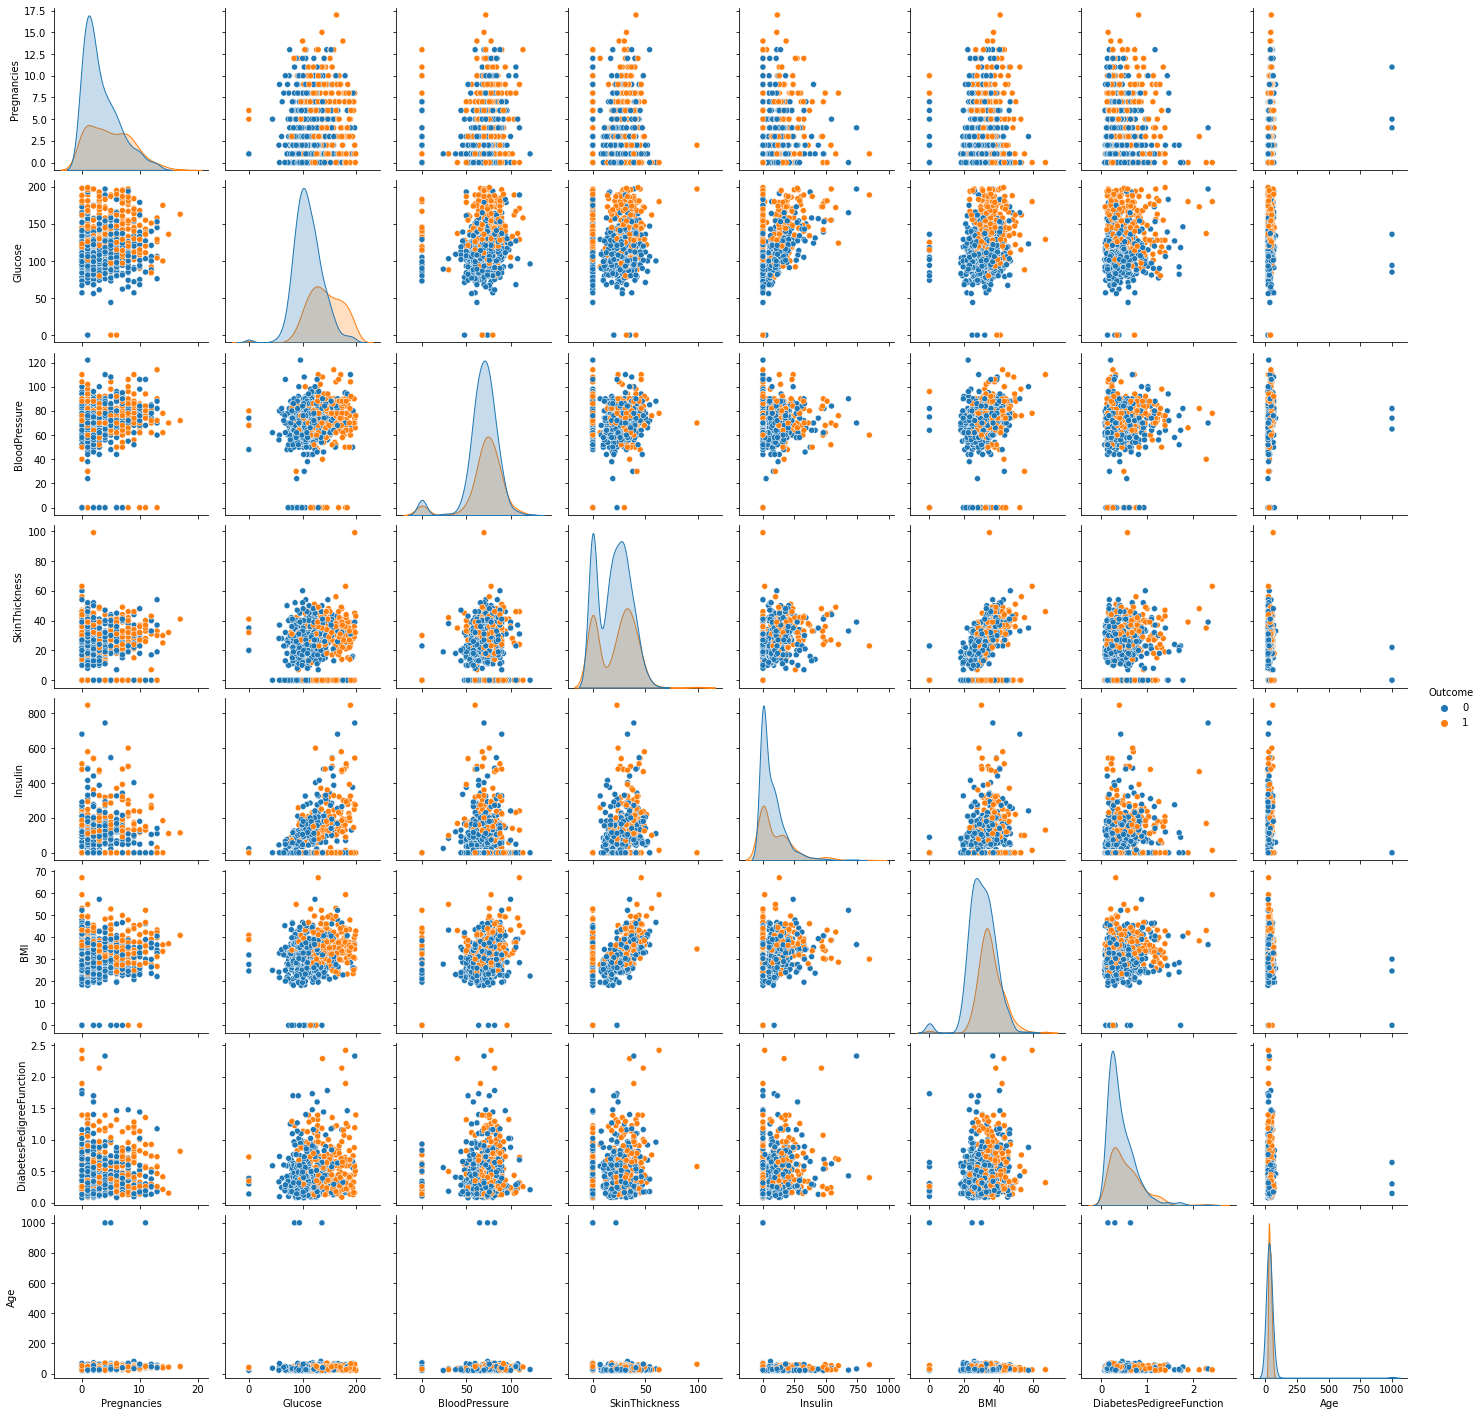

In [4]:
import seaborn as sns

sns.pairplot(data, diag_kind='kde',hue='Outcome')
plt.show()

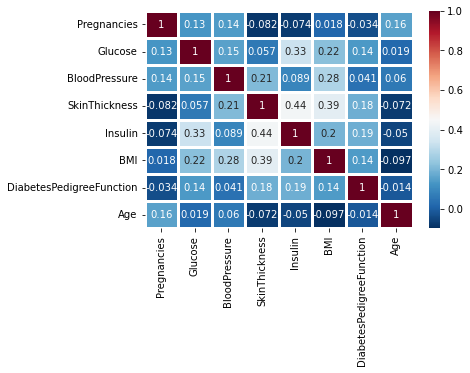

In [43]:
#상관계수

data_corr = data.drop(columns='Outcome').corr(method='pearson')
sns.heatmap(data_corr, xticklabels=data_corr.columns,
            yticklabels=data_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidths=3)
plt.show()

설명 변수들 간의 상관계수는 대체로 낮아 유의미한 상관관계는 없다고 판단

-> 모든 변수를 사용하여 모델링

- 2. 이상치를 식별하고 처리하시오.

In [44]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


평균과 min, 평균과 max값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 Boxplot으로 시각화하여 보는 것이 정확하다. boxplot을 한 번에 그려주기 위해서는 melt를 이용해 데이터를 재구조화해주어야한다.

In [45]:
x = data.drop(columns=['Outcome'])
df_v1 = pd.melt(x,var_name='col',value_name='value')
df_v1

,col,value
0,Pregnancies,6.0
1,Pregnancies,1.0
2,Pregnancies,8.0
3,Pregnancies,1.0
4,Pregnancies,0.0
...,...,...
6139,Age,63.0
6140,Age,27.0
6141,Age,30.0
6142,Age,47.0


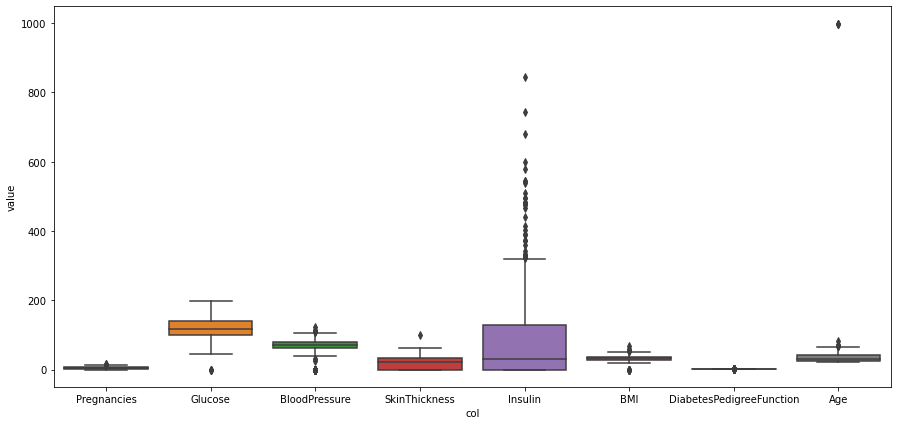

In [47]:
plt.figure(figsize=(15,7))
sns.boxplot(x='col',y = 'value',data=df_v1)
plt.xticks(range(8),x.columns)
plt.show()

boxplot으로 시각화해준 결과, Age의 경우, 중앙값과 멀리 떨어진 이상치가 눈에 띄었다. Insulin의 경우, 이상치들이 있지만, 이상치들이 연속적으로 이어져 있어 실제 이상치를 가진 사람이 있을 수 있으므로 현업의 의견이 필요할 것으로 판단되며 우선 눈에 보이는 Age의 이상치만을 처리하도록 한다. 

Age의 중앙값 : 29.0


c:\Users\suhye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

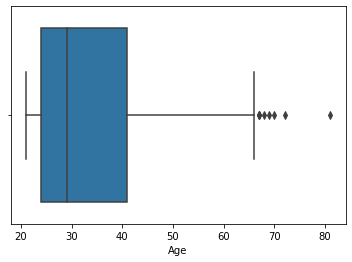

In [48]:
print('Age의 중앙값 :',data.Age.median())
outlier_index = data[data['Age'] > 400].index
data.loc[outlier_index,'Age'] = data.Age.median()
sns.boxplot(data['Age'])

추가적으로, Glucose와 BloodPressure 컬럼에는 0이 존재하지 않아야 한다고 판단되었다. 이를 이상치라고 판단하여 이상치를 제외한 중앙값으로 이상치를 대체하였다. 

In [49]:
outlier_index = data[data['Glucose'] == 0].index
data.loc[outlier_index, 'Glucose'] = data.Glucose.median()

outlier_index = data[data['BloodPressure'] == 0].index
data.loc[outlier_index,'BloodPressure'] = data.BloodPressure.median() 

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,79.799479,31.992578,0.471876,33.191406,0.348958
std,3.369578,30.438286,12.096642,15.952218,115.244002,7.884160,0.331329,11.683509,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 3. 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.

위 describe함수에서 최솟값과 최댓값의 차이가 많이 나는 컬럼이 존재한다. 따라서 선형 모델 적용 시 scale을 적용할 필요가 있어 보인다. 

2. 클래스 불균형 처리
- 1. 업샘플링 과정을 설명하고 결과를 작성하시오.

오버 샘플링은 소수의 레이블을 지닌 데이터셋을 다수 레이블의 데이터셋의 수만큼 증식시켜 학습에 사용하기 위해 충분한 양과 비율의 데이터를 확보하는 기법이다.  

- 랜덤오버 샘플링 : 소수의 레이블을 지닌 데이터셋을 단순 복제하여 다수의 레이블과 비율을 맞추는 방법이다. 데이터를 단순 복제하기 때문에 분포는 변하지 않지만, 그 수가 늘어나 가중치를 받을 수 있다. 소수의 클래스에 과적합이 발생할 가능성이 있다는 단점이 있지만, 사용방법이 간단하다는 장점이 있다. 

- SMOTE : 소수 레이블을 지닌 데이터셋의 관측값에 대한 K개의 최근접 이웃을 찾고, 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 샘플의 수를 늘리는 방법이다. Resampling 방식보다 처리 속도가 느리다는 단점이 있지만, 데이터를 단순히 동일하게 증식시키는 방식이 아니기 때문에 과적합을 예방할 수 있다는 장점이 있다. 


-> 과적합의 위험이 있는 랜덤 오버샘플링 대신 SMOTE 사용

In [50]:
#데이터 불균형 확인
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE
from collections import Counter

x = data.drop(columns = 'Outcome',axis=1)
y = data[['Outcome']]

smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x,y)
print(Counter(y_sm['Outcome']))

Counter({1: 500, 0: 500})


- 2. 언더샘플링 과정을 설명하고 결과를 작성하시오.

언더 샘플링은 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터셋이 가진 레이블의 수준으로 감소시키는 방법이다. 이 기법을 사용하면 데이터 불균형으로 인한 문제는 피할 수 있지만, 데이터의 수가 급격하게 줄어들어 오히려 학습 성능을 떨어뜨리는 결과를 초래할 수 있다. 

- Random Under Samplig : 다수를 차지하는 레이블에서 무작위로 데이터를 제거하는 방법이다. samplig_startegy 파라미터를 'majority'로 지정하면 다수 레이블의 데이터를 샘플링하여 소수 레이블의 데이터 수와 동일하게 줄인다. 

- Tomek link : 서로 다른 클래스가 있을 때, 서로 다른 클래스에 가장 가까운 데이터들이 토멕 링크로 묶여서 토멕 링크 중 다수 클래스의 데이터를 제거하는 방식

In [52]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under  = undersample.fit_resample(x,y)

print(Counter(y_under['Outcome']))

Counter({0: 268, 1: 268})


- 3. 둘 중 하나를 선택하고 선택한 이유를 서술하시오.

언더샘플링 기법을 사용하면 모델의 성능이 떨어질 수 있으므로 오버 샘플링 기법 사용

해당 데이터에서는 Oversampling이 적합하다. 데이터가 총 768개로 당뇨병 환자를 대표하기에는 너무 적은 데이터이다. 심지어 환자의 수는 768명 중 268명뿐이다. Undersampling을 선택하게 되면 전체 데이터가 더 적어지기 때문에 오버피팅이 일어날 위험이 더 크므로 oversampling을 선택하였다.

3. 모델링
- 1. 최소 3개 이상의 알고리즘을 제시하고, 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오.

svm, 로지스틱회귀, xgboost 


정확도 : svm, 속도 : 로지스틱

In [53]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import sklearn.svm as svm

log = LogisticRegression()
xgb = XGBClassifier()
svm_clf = svm.SVC(kernel='linear')

In [60]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

#5개의 경우의 수로 분할하여 검증
kfold = KFold()

def model_result(model):
    pred_li = []
    
    for train_index, test_index in kfold.split(x):
        x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index,:], y.iloc[test_index,:]
        
        x_train_resample, y_train_resample = smote.fit_resample(x_train,y_train)
        
        start = time.time()
        model.fit(x_train_resample, y_train_resample)
        end = time.time()
        
        pred = model.predict(x_test)
        pred_li.append(accuracy_score(pred,y_test['Outcome']))
        
        
    ## 마지막 데이터 학습 속도
    print(f"{end-start:.5f} sec")
    
    ##5개의 train 데이터에 대한 정확도 평균의 값
    print(np.mean(pred_li))
    

In [61]:
model_result(log)

c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

0.05567 sec
0.7553263729734317


c:\Users\suhye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

In [62]:
model_result(xgb)

0.27512 sec
0.7474492827434004


In [63]:
model_result(svm_clf)

c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

6.80974 sec
0.7605126899244546


속도 측면에서는 로지스틱회귀분석이 가장 빨랐으며, 정확도 측면에서는 랜덤포레스트 모델이 가장 정확하였다.

- 3. 속도 개선을 위한 차원축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하여 결과를 작성하시오. 



속도 개선을 위한 차원 축소방법인 PCA를 사용할 수 있다. 예측의 성능은 원본의 데이터를 그래도 사용하는 것 보다 떨어질 수 있지만, 차원을 축소함으로써 예측의 속도는 훨씬 상승시킬 수 있다. PCA를 사용할 때, 데이터 스케일에 따라 각 주성분이 설명 가능한 분산량이 달라질 수 잇기 때문에 데이터 스케일링을 꼭해주어야한다. 

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=0)

x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.3, random_state=2022)
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
pca = PCA(n_components=8)
x_train_pca = pca.fit(x_train_s)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())

[0.26110315 0.22613628 0.12025873 0.10650649 0.1016306  0.08197042
 0.05251497 0.04987936]
0.8156352463546329


In [73]:
#5개의 주성분을 가지고 모델링

def pca_model_result(model):
    pred_li = []
    
    for train_index, test_index in kfold.split(x):
        x_train, x_test = x.iloc[train_index,:], x.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index,:], y.iloc[test_index,:]
        
        x_train_resample, y_train_resample = smote.fit_resample(x_train, y_train)
        
        scaler = StandardScaler()
        x_train_res_s = scaler.fit_transform(x_train_resample)
        x_test_s = scaler.transform(x_test)
        
        
        pca = PCA(n_components=5)
        x_train_pca = pca.fit_transform(x_train_res_s)
        x_test_pca = pca.transform(x_test_s)
        
        start = time.time()
        model.fit(x_train_pca, y_train_resample)
        end = time.time()
        
        pred = model.predict(x_test_pca)
        pred_li.append(accuracy_score(pred, y_test['Outcome']))
        

        
    print(f"{end - start : .5f} sec")
    print(np.mean(pred_li))

In [74]:
pca_model_result(log)

 0.00344 sec
0.7279093455564045


c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [75]:
pca_model_result(xgb)

 0.28438 sec
0.7031491384432561


In [76]:
pca_model_result(svm_clf)

c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 0.03860 sec
0.7253034547152193


c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


예측 성능은 다소 떨어졌지만, 속도 측면에도 차원축소에 의해 더 빨라졌다. 향후에 데이터가 크게 늘어난다면 차원축소를 통해 성능 및 속도 측면에서 더 유의미한 결과를 찾아낼 수 있을 것이다. 